In [ ]:
!git clone https://github.com/stuniy/SPO_PGU.git

# Тема № 14.  Деревья решений и случайный лес

## Дерево принятия решений
На предыдущих занятиях мы познакомились с некоторыми методами машинного обучения - линейной и логистической  регрессиями. У этих, и у многих других методов, есть недостаток - результаты метода слабо понятны обычному человеку, или как говорят *слабо интерпретируемы*.

Действительно как объяснить человеку что

0.5 * (рост) + 0.9 * (вес) - 0.013 * (есть хвост) > 5 это слон, а 

0.5 * (рост) + 0.9 * (вес) - 0.013 * (есть хвост) < 5 это собака?

Как вообще можно складывать величины разной размерности рост в метрах и вес в килограммах, на уроках физики нам говорили что так нельзя, а здесь в линейной регрессии именно так и происходит. Хоть эти методы могут давать хорошие результаты, но объяснимость их очень маленькая. 

Человек думает и принимает решения по другому. ЕСЛИ сегодня выходной ТОГДА я не пойду в школу. ЕСЛИ мне поставят оценку больше 3 ТОГДА я буду хорошим учеником ИНАЧЕ плохим. 

Подобным образом на основе правил вида "ЕСЛИ ... ТОГДА ... ИНАЧЕ" (IF...THEN...ELSE...) рассуждает человек и это ему понятно. Вот бы и компьютер заставить думать также. Хм, но именно так мы пишем программы для компьютера, знакомая конструкция любого языка программирования, не правда ли?

Одного правила для принятия решения может быть не достаточно - тогда можем применить несколько правил, например:
```
ЕСЛИ оценка больше 4
ТОГДА отдыхать
ИНАЧЕ ЕСЛИ оценка больше 3
----- ТОГДА немножко подучить
----- ИНАЧЕ ЕСЛИ оценка больше 2
----------- ТОГДА учиться очень усердно
----------- ИНАЧЕ придется отчисляться
```
Раз мы можем написать такие правила для нашего решения, тогда что мешает это сделать компьютеру?

Для любой задачи, например классификации чего-нибудь, можем построить такие правила в виде некоторой иерархии. Пример на рисунке ниже.

Используя некоторую информацию об автовладельцах - атрибуты или признаки - страховая компания принимает решение страховать или нет такого автовладельца.

![img](https://drive.google.com/uc?id=1XuKxi0uZNJOSk9GqKDMgi7-ILXv9MYrO)

Изображения иерархии подобных правил напоминают изображение дерева (перевернутого вверх корнем), поэтому так и называются - **дерево принятия решений**. Места разветвлений - узлы, конечные узлы, которые уже не разветвляются - листья. Самый первый (верхний) узел - корень дерева. Это просто названия и никакой связи с биологическими деревьями нет.  В принципе деревья могут быть разной структуры, но мы будем говорить только о деревьях с ответами правил типа ДА\НЕТ.

## Обучение (создание) дерева

Когда дерево уже кем-то создано, мы можем им пользоваться без проблем, проверяя правила и таким образом выискивая подходящее решение.

Но дерево нужно создать, обучить. Для этого придумано множество методов, мы рассмотрим только один метод ["CART"](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms)        (Classification and Regression Trees) реализованный в библиотеке `sklearn`. 

Пусть, как и обычно в задачах классификации с учителем, имеется L обучающих векторов примеров входов \\(x^l\\) с n компонентами (атрибутами) каждый и столько же меток y описывающих класс, к которому относится каждый из примеров. Будем рассматривать только правила с ответами ДА/НЕТ и условиями вида \\(x_i^l \leq t_i\\),  t - некоторые пороги для атрибутов.

Для построения каждого узла дерева возьмем один из атрибутов (компонент входа) и сравним его с порогом. Разделим все обучающие примеры Q этого узла на две части, выборки, в одну Ql (левую) войдут примеры у которых условие \\(x_i^l \leq t_i\\) выполняется, а в другую Qr (правую) примеры у которых условие не выполняется. 
Посчитаем для этих двух выборок некоторую величину H(), называемую *неопределенность* (impurity, еще называют ее "загрязненность", "неточность", "критерий") и общую неопределенность узла

G = (число примеров в Ql)/(общее число примеров в Q)* H(Ql)+ (число примеров в Qr)/(общее число примеров в Q)* H(Qr).

И сделаем это для всех атрибутов и всех возможных значений порога этих атрибутов. Выберем такой атрибут и порог, для которых G минимально. По ним и будем окончательно строить узел.

Начиная с корня, в котором присутствуют все обучающие примеры \\(x^l\\), будем создавать новые и новые узлы, постепенно разбивая набор этих примеров на меньшие части по выбранным атрибутам и порогам пока не останется в каждом узле по одному примеру, или не выполнятся другие критерии останова обучения.

Так и получится дерево решений.

Реализовано несколько разных критериев *H()*. Такой критерий должен давать маленькое число, если мы смогли за одно разделение отделить классы полностью (идеальное разделение) и большое, если число примеров разного класса в разделенных множествах примерно одинаково (бесполезное разделение), например:

А) Для задач классификации на K классов:

1) *Неопределенность Джини*: для каждого класса считаем долю (p) примеров этого класса во всех примерах (их \\(N_m\\) штук) узла m (метки *y* представлены целыми числами от 0 до K-1) и считаем H() как 

$ p_k=\frac{1}{N_m}* \sum_{x_i \in Q_m} I(y_i=k), I=1\ если \ совпадает, \ 0 \ если  \ не \  совпадает \\
\\ H = \sum_{k} p_k*(1-p_k) \\ $

2) *Энтропия*:

$ H = - \sum_{k} p_k*log(p_k) \\ $

3) *Ошибка классификации*: 

$ H = 1-max(p_k) \\ $

Б) Для задач регрессии обычно используют среднеквадратичную ошибку:
сначала ищут среднее значение меток y в примерах узла m

$ y_{mean} = \frac{1}{N_m} \sum_{i\in N_m} y_i \\ $

а потом ищут среднеквадратичную ошибку

$ H =  \frac{1}{N_m} \sum_{i\in N_m} (y_i-y_{mean})^2 \\ $

Прекрасную анимацию создания дерева можно найти [здесь](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/).

Давайте реализуем классификатор на основе дерева для примеров [ирисов Фишера](https://ru.wikipedia.org/wiki/Ирисы_Фишера#Описание). В библиотеке `sklearn` есть модуль `tree` с различными функциями для деревьев, используем от туда `DecisionTreeClassifier()` для создания классификатора. Синтаксис его аналогичен другим классификаторам: команда `fit()` для обучения, `predict()` для расчета выходов. Для отображения дерева используем команду `plot_tree()` (она вернет и текстовое описание дерева), которая покажет для каждого узла выбранный атрибут (как индекс входного массива), порог, число примеров в узле общее (samples) и по классам (values), значение критерия (здесь gini).   
Параметры дерева решений:

`Критерий (criterion)`: Этот параметр определяет, как будет измеряться примесь. Значением по умолчанию является «Джини», но вы также можете использовать «энтропию» в качестве метрики для примесей.

`Разветвитель (splitter)`: Вот как дерево решений ищет функции для разделения. Значение по умолчанию установлено на «лучший». То есть для каждого узла алгоритм учитывает все функции и выбирает наилучшее разбиение. Если вы решите установить параметр разделителя на «случайный», то будет рассматриваться случайное подмножество объектов. Разделение будет затем выполнено наилучшей функцией в случайном подмножестве. Размер случайного подмножества определяется параметром max_features. 

`Максимальная глубина (max_depth)`: Этот параметр определяет максимальную глубину дерева. В нашем случае мы используем глубину два, чтобы сделать наше дерево решений. По умолчанию установлено значение none. Это часто приводит к переопределенным деревьям решений. Параметр глубины является одним из способов, которыми мы можем упорядочить дерево или ограничить его рост.

`min_samples_split`: Минимальное количество выборок, которое должен содержать узел, чтобы рассмотреть расщепление. Значение по умолчанию равно двум. Вы можете использовать этот параметр, чтобы упорядочить ваше дерево.

`min_samples_leaf`: Минимальное количество выборок необходимо считать листовым узлом. Значение по умолчанию установлено в единицу. Используйте этот параметр, чтобы ограничить рост дерева.

`max_features`: Количество функций, которые следует учитывать при поиске лучшего разделения. Если это значение не установлено, дерево решений будет учитывать все функции, доступные для наилучшего разделения В зависимости от вашего приложения, часто бывает полезно настроить этот параметр. 



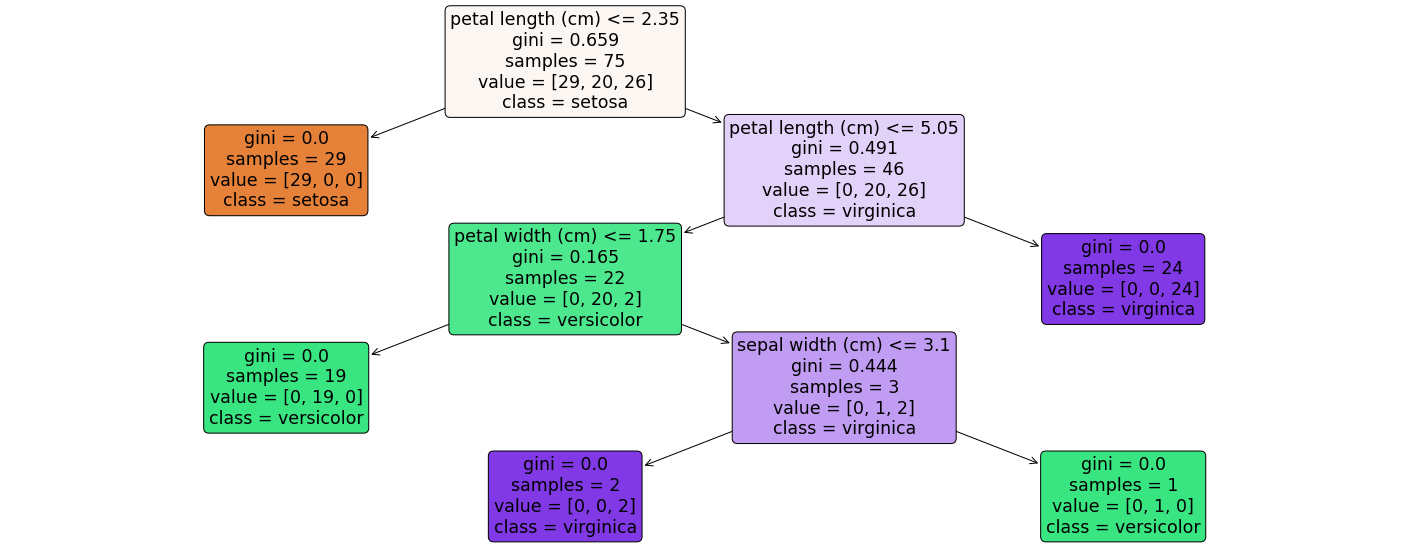

Проверка на новом образце setosa


In [12]:
from sklearn.datasets import load_iris # примеры данных 
from sklearn.tree import DecisionTreeClassifier, plot_tree# модуль для деревьев
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

iris = load_iris() # загружаем данные
X=iris.data # примеры входов
y=iris.target # метки (примеры выходов)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую # тестируем для другой точки

clf = DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(X_train, y_train) # обучаем его, т.е. создаем само дерево
y_score=clf.predict(X_test)
plt.figure(figsize=((25,10)))
plot_tree(clf,filled=True, feature_names=iris.feature_names,class_names=iris.target_names,rounded=True)
plt.show()
# проверка на новых образцах
sample_1=int(clf.predict([[5,5,1,3]]))
print(f"Проверка на новом образце {iris.target_names[sample_1]}")

На Рисунке вы можете видеть, что каждая коробка содержит несколько характеристик. Давайте начнем с описания содержимого самого верхнего узла, чаще всего называемого корневой узел, Корневой узел находится на глубине нуля, Depth 0, Узел - это точка в дереве решений, где задается вопрос. Это действие делит данные на меньшие подмножества.

**Длина лепестка (см)** <= 2,45: Первый вопрос, который задает дерево решений, - это если длина лепестка меньше 2,45. Основываясь на результате, он следует либо по истинному, либо по ложному пути.

**Джини = 0,667**: Оценка Джини - это показатель, который количественно определяет чистоту узла / листа (подробнее о листьях чуть выше). Оценка Джини больше нуля означает, что образцы, содержащиеся в этом узле, относятся к разным классам. Оценка Джини, равная нулю, означает, что узел чистый, что в этом узле существует только один класс выборок. Вы можете узнать больше о мерах загрязнения. Обратите внимание, что у нас показатель Джини больше нуля; поэтому мы знаем, что образцы, содержащиеся в корневом узле, относятся к разным классам.

**Образцы = 150**: Поскольку набор данных цветов ирисов содержит 150 образцов, это значение установлено равным 150.

**Значение = [50, 50, 50]**: value Список говорит вам, сколько образцов в данном узле попадают в каждую категорию. Первый элемент списка показывает количество образцов, принадлежащих классу setosa, второй элемент списка показывает количество образцов, принадлежащих классу versicolor, а третий элемент списка показывает количество принадлежащих ему образцов в классе virginica. Обратите внимание, что этот узел не является чистым, поскольку в одном и том же узле содержатся разные типы классов. Мы знали это уже по счету Джини, но на самом деле приятно видеть это.

**Класс = сетоза**: class значение показывает прогноз, который сделает данный узел, и его можно определить по значению value списока. Какой бы класс ни встречался в узле, он будет выбран как class ценность. Если бы дерево решений заканчивалось в корневом узле, было бы предсказано, что все 150 выборок принадлежали к классу setosa. Конечно, это не имеет смысла, поскольку для каждого класса существует одинаковое количество выборок. 


### `graphviz`
Для более наглядного отображения деревьев рекомендуется использовать библиотеку [`graphviz`](https://graphviz.org/), которая позволяет сохранять и отображать деревья в специальном формате **DOT**.


Примечание: Нужно установить и библиотеку и ее исполняемые файлы, не забыть прописать путь к ней в системную переменную PATH.

In [13]:
import graphviz # подключаем библиотеку для отображения деревьев
dot_data = tree.export_graphviz(clf, out_file=None) # конвертируем в DOT (в переменную или в файл) 
graph = graphviz.Source(dot_data)  # загружаем дерево из переменной или файла в представление graphviz
graph.render("iris") # отображаем в файл (по умолчанию pdf)

'iris.pdf'

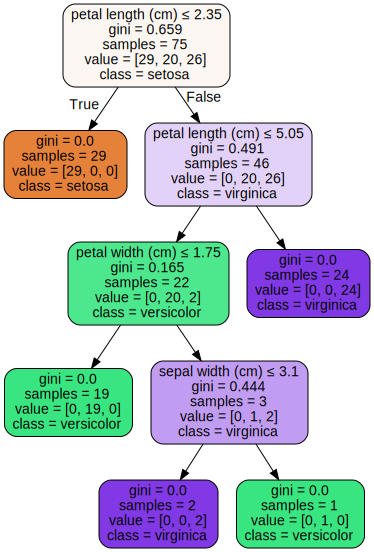

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None,  # можем указать дополнительные опции конвертации
                     feature_names=iris.feature_names, #  названия атрибутов
                     class_names=iris.target_names,   # названия классов
                     filled=True, rounded=True,  # прочие детали отображения
                     special_characters=True)  #
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране

Функция `export_text()` из того же модуля `sklearn.tree` позволяет отобразить дерево в форматированном текстовом виде правил ЕСЛИ...ТОГДА...ИНАЧЕ  

In [15]:
from sklearn.tree import export_text # подключаем функцию
r = export_text(clf, feature_names=iris['feature_names']) # переводим дерево в текстовую строку
print(r) # печатаем

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal length (cm) <= 5.05
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  5.05
|   |   |--- class: 2



# Случайный лес
Дерево решений может оказаться очень большим, со многими уровнями, и его считать придется очень долго. Это не эффективно. Можно ограничить *глубину* дерева (число уровней), но тогда пострадает качество решения задачи. Выход - использовать много меньших деревьев. Пусть одно из них не сможет точно решить задачу, но их совокупность может быть точнее. Если 90 из 100 деревьев сообщают о классе №1, а остальные о классе №2, то можно поверить большинству и в окончательном решении принять класс №1. Получается что не одно дерево, а их множество (совокупность, комитет, объединение и пр. синонимы) будет принимать решение. Тогда отдельное дерево можно сделать по-проще, с меньшей глубиной.

Но правило толпы, что выбор наиболее популярного решения будет более правильный и точный, как и в нашей жизни с голосованиями, работает далеко не всегда. Важно, чтобы голосующие были как можно меньше связаны между собой, чтобы не впадать в общие заблуждения. Так же и для деревьев, надо чтобы деревья в этом множестве были не совсем похожи друг на друга. Этого можно добиться (частично) если деревья создавать на случайно выбранных подмножествах примеров (возможно с повторениями) и случайно выбранных атрибутах.

Множество деревьев это лес :). А множество случайно созданных деревьев это **случайный лес** (random forest по английски). Это очень мощный, популярный и эффективный метод машинного обучения. Часто это первый кандидат для решения поставленной задачи.

В библиотеке `sklearn` случайный лес для классификации реализован в классе [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) входящим в модуль `ensemble` (почему так, а не в модуле `tree` мы узнаем на последующих занятиях).

При создании такого классификатора указываются:
* `n_estimators` - максимальное число деревьев в лесу
* `criterion` - критерий для создания узла: или критерий Джини `gini` (по умолчанию), или энтропия `entropy`.
* `max_depth` - максимальная глубина дерева
* `max_features` - максимальное число атрибутов, которые будут проверены при создании узла, по умолчанию это равно корню квадратному из числа всех атрибутов в данных.  
* `max_samples` - максимальное число примеров используемых для одного дерева (примеры выбираются случайно). 
* и другие менее важные аргументы. 

Создаваемый объект класса `RandomForestClassifier` имеет важные поля:
* `estimators_` - список объектов деревьев (типа `DecisionTreeClassifier`) в этом лесу
* `classes_` - метки классов
* `n_classes_` - число классов
* `n_features_` - число атрибутов
* `n_outputs_` - число выходов
* [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_) - оценка **важности** атрибутов. Очень полезные сведения, показывающие какой вклад дает тот или иной атрибут в точность решения задачи. Полезно, например, для существенного уменьшения размера дерева: удалив атрибуты с малой важностью не сильно потеряем в точности. Полезно и для интерпретируемости результатов. Вычисляется как суммарная величина уменьшения критерия неопределенности для этого атрибута.

Реализованы методы:
* `apply()` - применение деревьев и расчет индексов листьев 
* `decision_path()` - возвращает конкретный путь принятия решения по лесу 
* `fit()` - обучение леса
* `predict()` - расчет класса для заданного примера
* `score()` - расчет средней точности классификатора для заданных примеров 
* и другие.




  

### Пример случайного леса на синтетических данных
Давайте создадим некоторые данные с двумя классами на плоскости и классифицируем их случайным лесом. Воспользуемся функцией `make_classification`  из `sklearn.datasets` для создания данных в виде двух пересекающихся классов с шумом, и функцией `train_test_split` из `sklearn.model_selection` для разделения их на обучающие и тестовые примеры. 

In [24]:
from sklearn.datasets import make_classification # для генерации данных
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns # для простого отображения
import matplotlib.pyplot as plt #

# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=5,# максимальная глубина дерева
                             n_estimators=10,# число деревьев в лесу
                             max_features=1)# максимальное число признаков для каждого дерева

clf.fit(X_train, y_train) # обучаем 

y_pred = clf.predict(X_test) # проверяем на тестовых данных

score=clf.score(X_test, y_test) # считаем среднюю точность
print(score)

# оценка точности модели
print(metrics.classification_report(y_test, y_pred))
# матрица неточности
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        17

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

[[19  0  0]
 [ 0 18  0]
 [ 0  0 17]]


Выше не зря слова "правильно" и "неправильно" классифицированные взяты в кавычки. С точки зрения самого метода, крестиками обозначены неправильно классифицированные примеры, у которых метка результата не совпадает с исходной меткой класса в данных. Но как вы можете увидеть своими глазами, именно эти примеры данных были "шумом", т.е. специально сделанными неправильными примерами. И случайный лес справился, отсеял шум, распознав их верно с точки зрения нас как создателей данных.

Это важно осознать, когда мы считаем точность или другие метрики для классификаторов, то можем их посчитать только на тестовых данных. **Но никто не гарантирует что эти тестовые данные сами по себе не ошибочны!** 

Так что может быть такая ситуация, что точность маленькая, а классификатор работает отлично, игнорируя ошибки в самих данных. 

Попробуйте изменять максимальную глубину и число деревьев, посмотрите, как это влияет на разделяющую поверхность и точность.

Каждое дерево в лесу можно нарисовать, давайте посмотрим на одно из них.


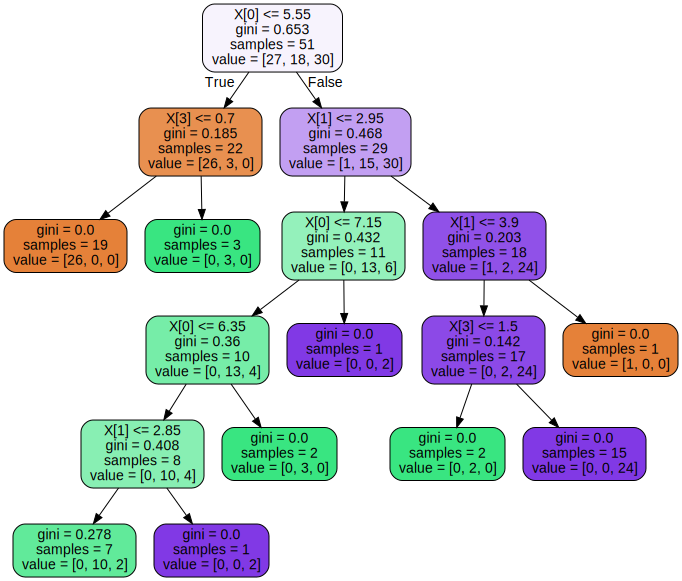

In [19]:
tree_data=clf.estimators_[2] # третье дерево

# рисуем его
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_data, out_file=None,  # можем указать дополнительные опции конвертации
                     filled=True, rounded=True)  # прочие детали отображения
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране


## Пример на другом наборе данных
Разумеется все тоже самое работает и на других наборах данных, многомерных.

Оценить качество классификации можно с помощью разных метрик, например аккуратность (accuracy) или F1-мера, и др. Вспомните, что они обозначают и как считаются. В `sklearn` такие метрики находятся в модуле  `metrics` под названиями `accuracy_score`, `precision_score`, `recall_score`, `f1_score`.

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']
Accuracy= 0.9814814814814815
F1= 0.981929181929182
Precision= 0.9833333333333334
Recall= 0.9814814814814815


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


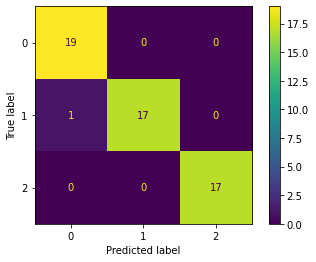

In [20]:
from sklearn.datasets import load_wine
# загружаем данные
data_wine = load_wine()

# атрибуты
print("Features: ", data_wine.feature_names)

# метки классов
print("Labels: ", data_wine.target_names)
# 
X = data_wine.data
y = data_wine.target
# разделяем на обучающие и тестовые 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# создаем классификатор
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2)
# обучаем его
clf.fit(X_train, y_train)
# проверяем на тестовых данных
pred = clf.predict(X_test)
# считаем метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average="macro")
precision = precision_score(y_test, pred, average="macro")
recall=recall_score(y_test, pred, average="macro")
print('Accuracy=',accuracy)
print('F1=',f1)
print('Precision=',precision)
print('Recall=',recall)
plot_confusion_matrix(clf,X_test, y_test)

Визуализация модели

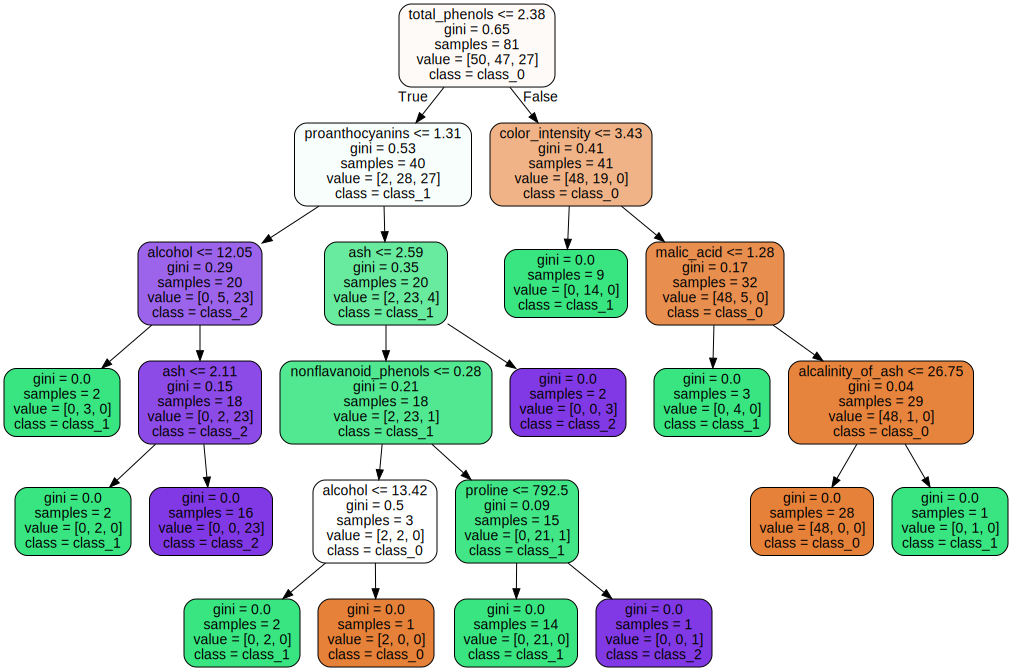

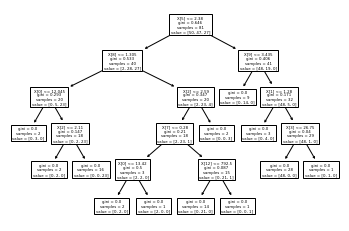

In [21]:
# выбираем дерево из леса
estimator = clf.estimators_[5]
# рисуем его
import graphviz
from sklearn import tree
tree.plot_tree(estimator) ;
tree_data=tree.export_graphviz(estimator, out_file=None, 
                feature_names = data_wine.feature_names,
                class_names = data_wine.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True);

graph=graphviz.Source(tree_data,format='png');
graph


Домашнее задание
1. Повторите эксперимент, лабораторной работы.
2. Используя один из наборов данных, например, diabets проведите классификацию.
3. Оценить качество построенной модели, основываясь на матрице неточности и ROC-анализе.
